In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']    

In [3]:
print(x_train.shape)
print(len(y_train))
print(y_train)
print(np.unique(y_train))
print(x_test.shape)
print(len(y_test))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
[0 1 2 3 4 5 6 7 8 9]
(10000, 28, 28)
10000


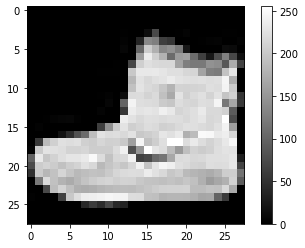

In [4]:
plt.imshow(x_train[0],cmap='gray')
plt.colorbar()
plt.show()

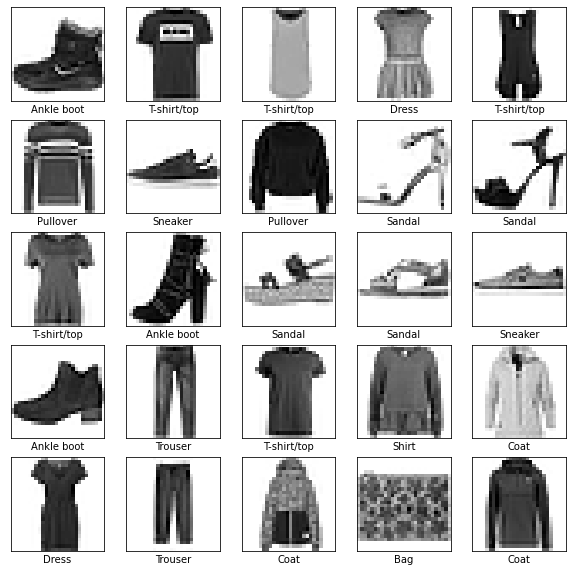

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)          # subplot [5-rows  &  5-columns] 
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)       
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [6]:
# x_train = x_train / 255.0
# y_train = y_train / 255.0

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 118,940
Trainable params: 118,940
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=10) # less epochs means UF , more epochs means OF

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.4974 - accuracy: 0.7598
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4993 - accuracy: 0.8242
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4438 - accuracy: 0.8411
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4218 - accuracy: 0.8477
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4060 - accuracy: 0.8565
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3777 - accuracy: 0.8643
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3628 - accuracy: 0.8697
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3535 - accuracy: 0.8723
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3444 - accuracy: 0.8756
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.33

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.3904 - accuracy: 0.8625
Test Loss: 0.39040276408195496
Test accuracy: 0.862500011920929


In [12]:
prediction = model.predict(x_test)        
prediction

array([[1.10954254e-07, 8.51646109e-06, 1.66721790e-07, ...,
        4.96398099e-02, 2.21706534e-04, 9.41519797e-01],
       [1.33627836e-04, 5.90181480e-06, 9.84344423e-01, ...,
        2.05416714e-21, 1.17695697e-06, 1.69302255e-20],
       [3.79749920e-08, 1.00000000e+00, 5.23996575e-11, ...,
        0.00000000e+00, 5.07473155e-18, 0.00000000e+00],
       ...,
       [3.14259960e-05, 7.31809067e-08, 1.20157182e-08, ...,
        1.34082090e-12, 9.99955058e-01, 1.44757551e-13],
       [7.43362773e-03, 7.80466378e-01, 1.54620712e-03, ...,
        8.56307455e-11, 5.41892834e-04, 2.47123104e-08],
       [1.31019822e-03, 1.92472726e-04, 1.19040778e-03, ...,
        3.82470116e-02, 1.36599109e-01, 2.58213747e-03]], dtype=float32)

In [13]:
prediction.shape

(10000, 10)

In [14]:
prediction[0]     # will print output of image number 1, class which in it 1 is the desired class for this image
                  # will follow the class number 0

array([1.10954254e-07, 8.51646109e-06, 1.66721790e-07, 6.73975810e-05,
       1.32366875e-03, 7.19993003e-03, 1.89776838e-05, 4.96398099e-02,
       2.21706534e-04, 9.41519797e-01], dtype=float32)

In [15]:
import numpy as np
print( np.argmax(prediction[0]) )          # will return (the index of the greatest number) the greatest number is (1) which is index 9, so exactly follow class 9
print(y_test[0])

9
9


In [16]:
class_names[9]

'Ankle boot'

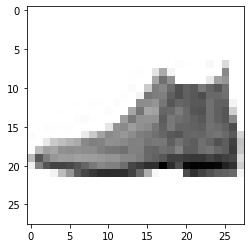

In [17]:
plt.imshow(x_test[0],cmap=plt.cm.binary)       # will print the actual image and compare it with prediction image 
plt.show()

In [18]:
prediction[20]     # will print output of image number 21, class which in it 1 is the desired class for this image
                  # will follow the class number 2

array([3.1617980e-02, 1.9842394e-04, 9.0677881e-01, 7.9289115e-05,
       1.7557306e-02, 4.6791296e-14, 3.7582390e-02, 3.5014271e-17,
       6.1858618e-03, 1.0553136e-16], dtype=float32)

In [19]:
import numpy as np
print( np.argmax(prediction[20]) )          # will return (the index of the greatest number) the greatest number is (1) which is index 9, so exactly follow class 9
print(y_test[20])                           # compare between [prediction & y_test(actual)], if the same then model good

2
2


In [20]:
class_names[2]

'Pullover'

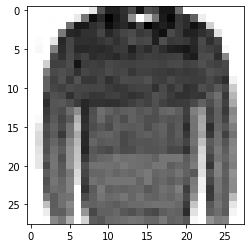

In [21]:
plt.imshow(x_test[20],cmap=plt.cm.binary)       # will print the actual image and compare it with prediction image 
plt.show()

In [22]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)



In [23]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


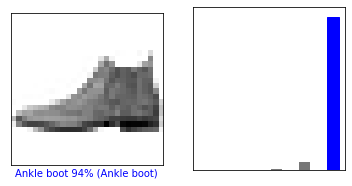

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, prediction,  y_test)
plt.show()

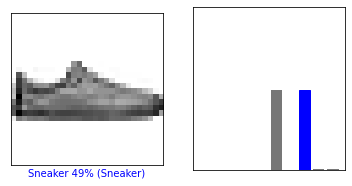

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, prediction,  y_test)
plt.show()

In [26]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

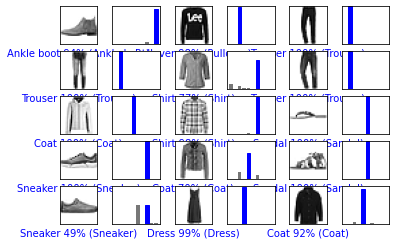

In [27]:
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, prediction, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, prediction, y_test)
plt.show()

In [28]:
# Grab an image from the test dataset
img = x_test[0]

print(img.shape)

(28, 28)


In [29]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.1095404e-07 8.5164611e-06 1.6672163e-07 6.7397581e-05 1.3236682e-03
  7.1999338e-03 1.8977666e-05 4.9639810e-02 2.2170652e-04 9.4151980e-01]]


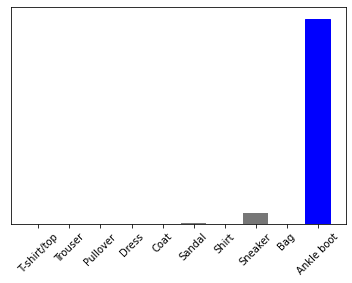

In [31]:
plot_value_array(0, predictions_single, y_test)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [32]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
